In [16]:
import pandas as pd
import seaborn as sn
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import spline

In [17]:
%matplotlib inline
plt.style.use('dark_background')
plt.rcParams['figure.figsize'] = (16, 9)

plt.rcParams['font.size'] = 18
plt.rcParams['axes.labelsize'] = 28
plt.rcParams['axes.titlesize'] = 28
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20
plt.rcParams['legend.fontsize'] = 14
plt.rcParams['figure.titlesize'] = 14

In [24]:
?np.random.randint

In [18]:
def init(mu, sigma, seed_arr, root, price_init, minutes, plot_init):
    loop_var = 0
    for seed in seed_arr:
        np.random.seed(seed)
        global df
        df = pd.DataFrame(columns = ['time', 'price', 'delta', 'quantity', 'volume', 
                                     'price_d1', 'volume_d1',
                                    'price_d2', 'volume_d2',
                                    'price_d3', 'volume_d3',
                                    'price_d4', 'volume_d4',
                                    'price_d5', 'volume_d5'])
        
        df['delta'] = np.random.normal(mu, sigma, minutes + 1)
        
        df['delta_d1'] = np.random.normal(mu*1.03, sigma*.86, minutes + 1)
        df['delta_d2'] = np.random.normal(mu*0.9, sigma*.93, minutes + 1)
        df['delta_d3'] = np.random.normal(mu*0.94, sigma*1.12, minutes + 1)
        df['delta_d4'] = np.random.normal(mu*1.21, sigma*1.03, minutes + 1)
        df['delta_d5'] = np.random.normal(mu*1.07, sigma*0.93, minutes + 1)
        
        df['volume'] = np.random.randint(1, 100, minutes+1)*100
        df['volume_d1'] = np.random.randint(1, 175, minutes+1)*100
        df['volume_d2'] = np.random.randint(1, 220, minutes+1)*100
        df['volume_d3'] = np.random.randint(1, 80, minutes+1)*100
        df['volume_d4'] = np.random.randint(1, 140, minutes+1)*100
        df['volume_d5'] = np.random.randint(1, 180, minutes+1)*100
        
        df['strategy'] = 0
        
        
        df['time'] = df.index
        df.loc[0, 'price'] = price_init
        df.loc[0, 'price_d1'] = price_init*1.15
        df.loc[0, 'price_d2'] = price_init*1.12
        df.loc[0, 'price_d3'] = price_init*0.8
        df.loc[0, 'price_d4'] = price_init*.85
        df.loc[0, 'price_d5'] = price_init*1.2
        
        for i in range(1, minutes + 1):
            df.loc[i, 'price'] = df.loc[(i-1), 'price'] + df.loc[(i - 1), 'delta']
            df.loc[i, 'price_d1'] = df.loc[(i-1), 'price_d1'] + df.loc[(i - 1), 'delta_d1']
            df.loc[i, 'price_d2'] = df.loc[(i-1), 'price_d2'] + df.loc[(i - 1), 'delta_d2']
            df.loc[i, 'price_d3'] = df.loc[(i-1), 'price_d3'] + df.loc[(i - 1), 'delta_d3']
            df.loc[i, 'price_d4'] = df.loc[(i-1), 'price_d4'] + df.loc[(i - 1), 'delta_d4']
            df.loc[i, 'price_d5'] = df.loc[(i-1), 'price_d5'] + df.loc[(i - 1), 'delta_d5']

            
            
            
        if seed == root:
            color = '#ff7200'
        else:
            color = [0.7,0.7,0.7]    
        if(plot_init == True):
            #plt.axhline( y = price_init, linewidth=3, color=[0.7, 0.7, 0.7])
            plt.grid(b=True, which='major', color=[0.2,0.2,0.2])
            plt.xlabel('minutes')
            plt.ylabel('price')
            plt.ylim((70,120))
            plt.plot(df['time'], df['price'], linewidth = 4, color = color, alpha = 0.8)
        loop_var = loop_var + 1

In [19]:
def share_plot(param_arr, price_init, quantity_init, minutes, buy, delta):
    loop_var = 0
    #plt.axhline(y = quantity_init, linewidth=5, color=[0.7, 0.7, 0.7])
    plt.grid(b = True, which = 'major', color = [0.2,0.2,0.2])    

    for param in param_arr:
        df.loc[0, 'quantity'] = quantity_init
        price_up = price_init * (1 + param /100)
        price_down = price_init * (1 - param/100)
        i = 1
        for x in range(1, minutes):
            if df.loc[i, 'price'] >= price_up:
                df.loc[i, 'quantity'] = df.loc[i-1, 'quantity'] - buy
            elif df.loc[i, 'price'] <= price_down:
                df.loc[i, 'quantity'] = df.loc[i-1, 'quantity'] + buy
            else:
                df.loc[i, 'quantity'] = df.loc[i-1, 'quantity']
            i = i + 1
        plt.xlabel('minutes')
        plt.ylabel('quantity')
        if param == delta:
            color = 'magenta'
        else:
            color = [0.5,0.5,0.5]
        plt.plot(df['time'], df['quantity'], color = color, linewidth = 4, alpha = 0.8)
        loop_var = loop_var + 1

In [20]:
def share_plot2(param_arr, price_init, quantity_init, minutes, buy, delta):
    loop_var = 0
    #plt.axhline(y = quantity_init, linewidth=5, color=[0.7, 0.7, 0.7])
    plt.grid(b = True, which = 'major', color = [0.2,0.2,0.2])
    
    for param in param_arr:
        df.loc[[0, 1], 'quantity'] = quantity_init
        i = 1
        price_up = price_init * (1 + param /100)
        price_down = price_init * (1 - param/100)
        for x in range(1, minutes):
            if((df.loc[(i-1), 'price'] >= price_up) and (df.loc[(i-2), 'price'] >= price_up)):
                df.loc[i, 'quantity'] = df.loc[i-1, 'quantity'] - buy
            elif(df.loc[(i-1), 'price'] <= price_down) and (df.loc[(i-2), 'price'] <= price_down):
                if(df.loc[i-1, 'quantity'] == 0): 
                    df.loc[i, 'quantity'] = df.loc[i-1, 'quantity']
                else:
                    df.loc[i, 'quantity'] = df.loc[i-1, 'quantity'] - buy
            else:
                df.loc[i, 'quantity'] = df.loc[i-1, 'quantity']
            i = i + 1
        plt.plot(df['time'], df['quantity'], color = [0.5,0.5,0.5], alpha = 0.8)
        loop_var = loop_var + 1

<h2>Single model, single parameter</h2>

In [21]:
p = 100
mu = 0
sigma = 0.5
minutes = 500
root = 500

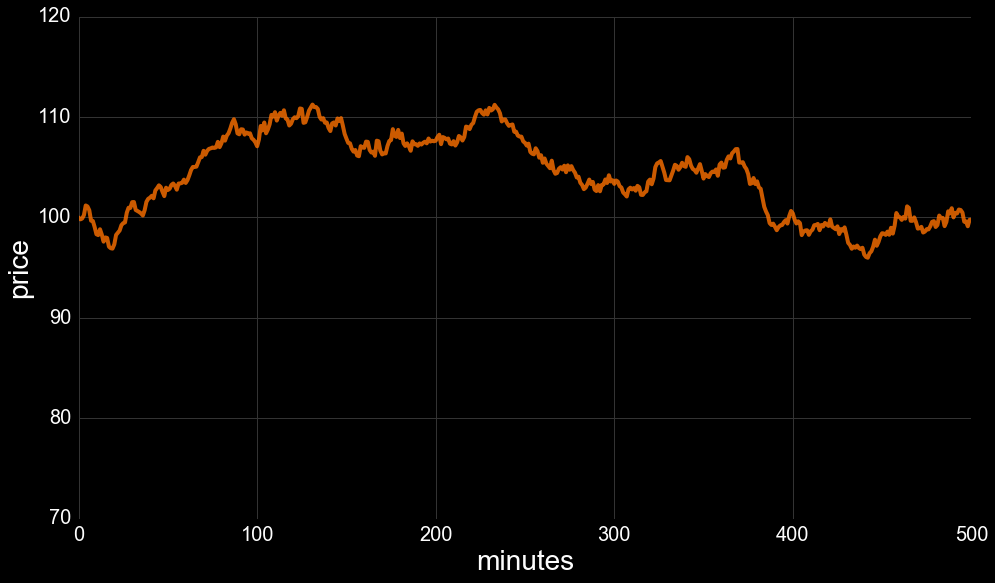

In [22]:
init(mu = mu, sigma = sigma, seed_arr = [root], root = root, price_init = p, minutes = minutes, plot_init = True)

In [23]:
df.head()

,time,price,delta,quantity,volume,price_d1,volume_d1,price_d2,volume_d2,price_d3,...,price_d4,volume_d4,price_d5,volume_d5,delta_d1,delta_d2,delta_d3,delta_d4,delta_d5,strategy
0,0,100,-0.188682,NaN,4400,115,9800,112,10900,80,...,85,1700,120,4600,0.043146,0.279070,0.112275,-1.044022,0.457094,0
1,1,99.8113,0.083379,NaN,5200,115.043,16700,112.279,6700,80.1123,...,83.956,9600,120.457,10600,0.401385,-0.696148,0.329931,-0.261794,-0.459049,0
2,2,99.8947,0.341401,NaN,2800,115.445,14100,111.583,13600,80.4422,...,83.6942,8700,119.998,13800,0.202883,0.183348,-0.262578,0.023335,-0.881566,0
3,3,100.236,0.960689,NaN,7200,115.647,1200,111.766,9300,80.1796,...,83.7175,3700,119.116,4900,-0.246977,-0.040624,0.522796,0.211520,-0.472447,0
4,4,101.197,-0.098518,NaN,4400,115.4,9900,111.726,13200,80.7024,...,83.929,5100,118.644,17800,0.393505,-0.510722,0.989325,0.507374,-0.274222,0


In [24]:
df.tail()

,time,price,delta,quantity,volume,price_d1,volume_d1,price_d2,volume_d2,price_d3,...,price_d4,volume_d4,price_d5,volume_d5,delta_d1,delta_d2,delta_d3,delta_d4,delta_d5,strategy
496,496,99.5815,0.030429,NaN,200,118.332,14100,121.076,18200,73.7801,...,57.4744,11100,108.14,700,0.775076,-0.204142,-0.242492,0.204668,-0.565312,0
497,497,99.612,-0.487687,NaN,8400,119.107,1200,120.872,11000,73.5376,...,57.6791,11000,107.575,10100,-0.243426,0.642285,-0.828705,-0.784515,-0.283843,0
498,498,99.1243,0.646786,NaN,7800,118.864,12700,121.514,5300,72.7089,...,56.8946,8200,107.291,12700,-0.694061,0.491732,-0.084261,0.207116,-0.618715,0
499,499,99.7711,0.002442,NaN,6300,118.17,2400,122.006,2400,72.6246,...,57.1017,5500,106.672,13400,0.339380,-0.885618,0.159654,-0.516794,0.916968,0
500,500,99.7735,-0.039403,NaN,8400,118.509,10300,121.12,16900,72.7843,...,56.5849,13600,107.589,6600,0.510403,0.281823,0.216410,-0.137893,0.238785,0


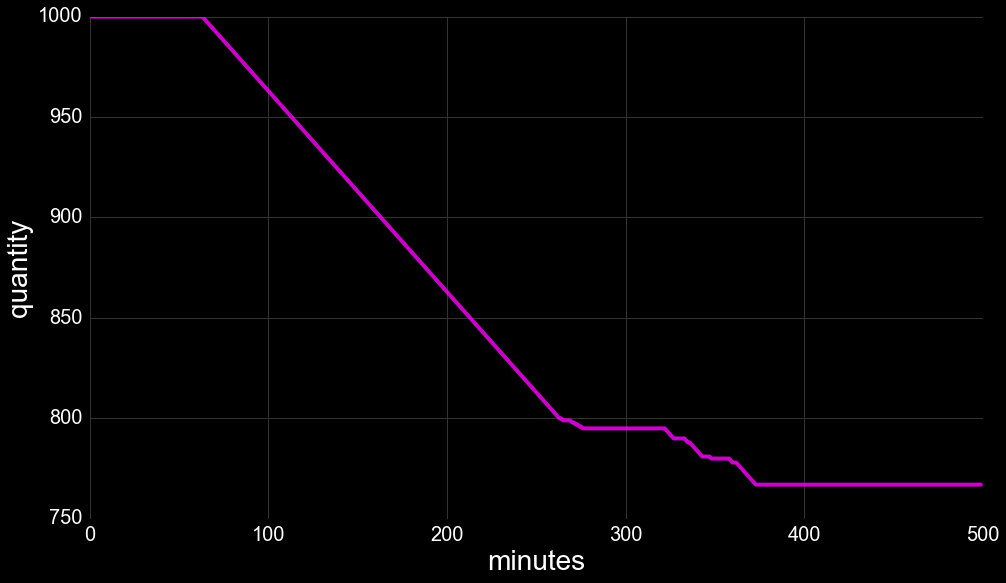

In [25]:
share_plot(param_arr = [5], price_init = p, quantity_init = 1000, minutes = minutes, buy = 1, delta = 5) #WITH +-5%

<h2>Varying parameter</h2>

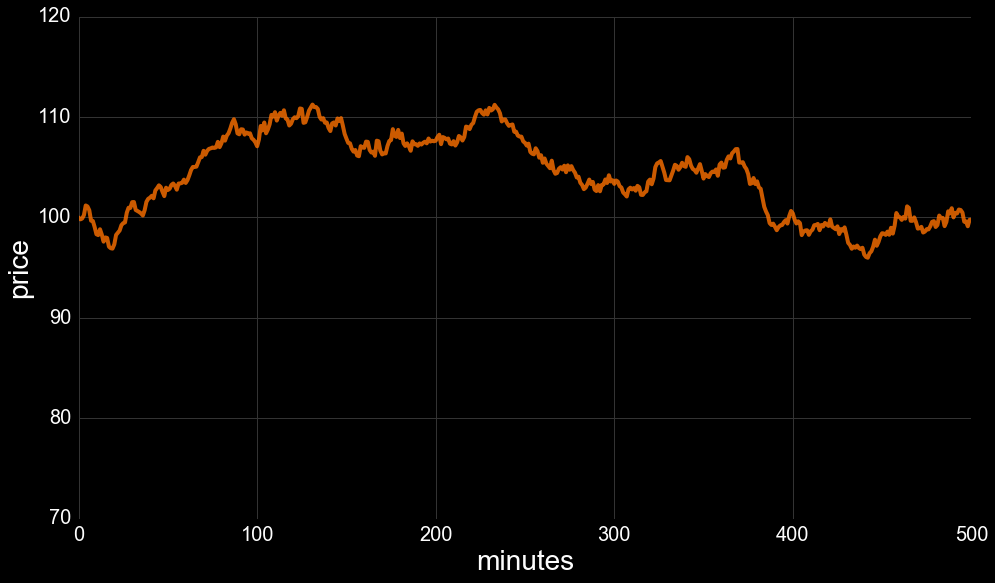

In [26]:
init(mu = mu, sigma = sigma, seed_arr = [root], root = root, price_init = p, minutes = minutes, plot_init = True)

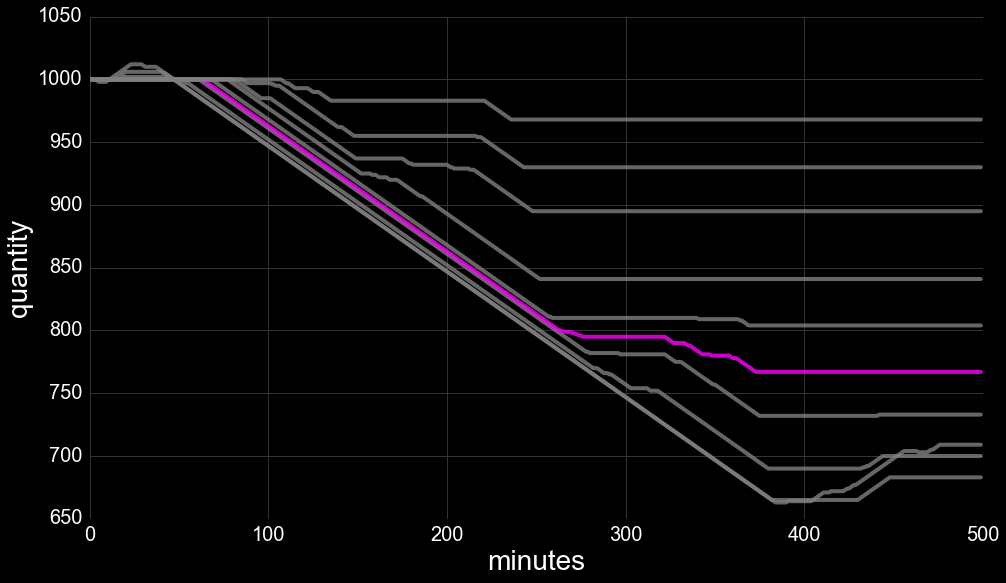

In [27]:
share_plot(param_arr = list(range(1,11)), price_init = 100, quantity_init = 1000, minutes = 500, buy = 1, delta = 5)

<h2>Varying Input</h2>

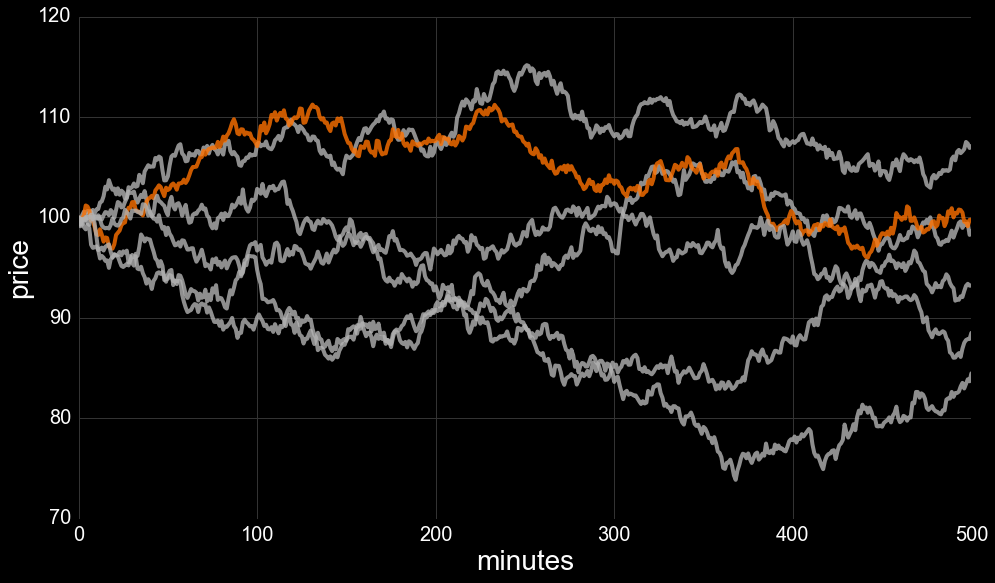

In [28]:
init(mu = mu, sigma = sigma, seed_arr = [100, 200, root, 800, 1000, 1600], root = root, \
     price_init = p, minutes = minutes, plot_init = True)

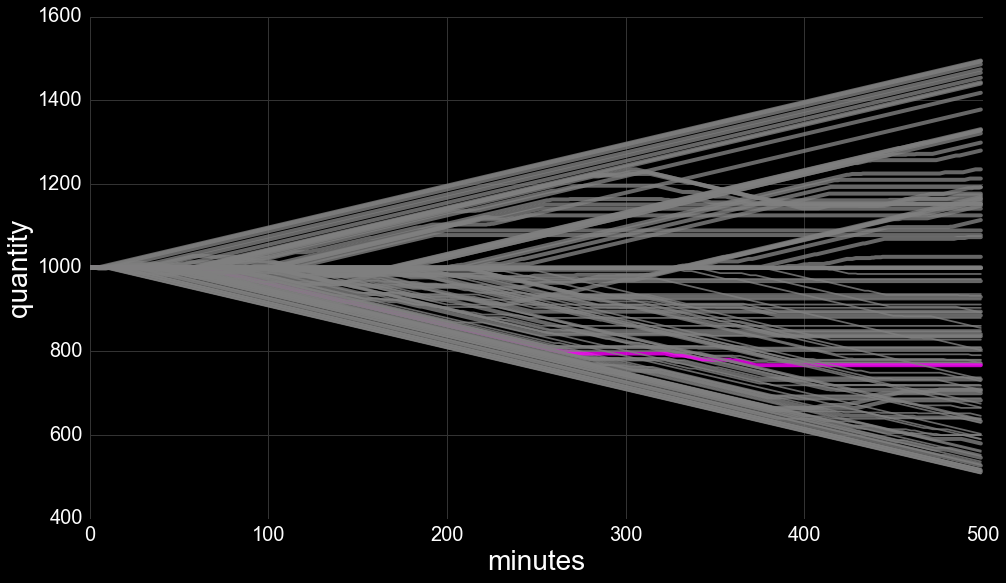

In [29]:
init(mu = mu, sigma = sigma, seed_arr = [100], root = root, price_init = p, minutes = minutes, plot_init = False)
share_plot(param_arr = list(range(1,11)), price_init = p, quantity_init = 1000, minutes = minutes, buy = 1, delta = 11) #WITH +-5%
share_plot2(param_arr = list(range(1,11)), price_init = p, quantity_init = 1000, minutes = minutes, buy = 1, delta = 5) #WITH +-5%
init(mu = mu, sigma = sigma, seed_arr = [200], root = root, price_init = p, minutes = minutes, plot_init = False)
share_plot(param_arr = list(range(1,11)), price_init = p, quantity_init = 1000, minutes = minutes, buy = 1, delta = 11) #WITH +-5%
share_plot2(param_arr = list(range(1,11)), price_init = p, quantity_init = 1000, minutes = minutes, buy = 1, delta = 5) #WITH +-5%
init(mu = mu, sigma = sigma, seed_arr = [root], root = root, price_init = p, minutes = minutes, plot_init = False)
share_plot(param_arr = list(range(1,11)), price_init = p, quantity_init = 1000, minutes = minutes, buy = 1, delta = 5) #WITH +-5%
share_plot2(param_arr = list(range(1,11)), price_init = p, quantity_init = 1000, minutes = minutes, buy = 1, delta = 5) #WITH +-5%
init(mu = mu, sigma = sigma, seed_arr = [800], root = root, price_init = p, minutes = minutes, plot_init = False)
share_plot(param_arr = list(range(1,11)), price_init = p, quantity_init = 1000, minutes = minutes, buy = 1, delta = 11) #WITH +-5%
share_plot2(param_arr = list(range(1,11)), price_init = p, quantity_init = 1000, minutes = minutes, buy = 1, delta = 5) #WITH +-5%
init(mu = mu, sigma = sigma, seed_arr = [1000], root = root, price_init = p, minutes = minutes, plot_init = False)
share_plot(param_arr = list(range(1,11)), price_init = p, quantity_init = 1000, minutes = minutes, buy = 1, delta = 11) #WITH +-5%
share_plot2(param_arr = list(range(1,11)), price_init = p, quantity_init = 1000, minutes = minutes, buy = 1, delta = 5) #WITH +-5%
init(mu = mu, sigma = sigma, seed_arr = [1200], root = root, price_init = p, minutes = minutes, plot_init = False)
share_plot(param_arr = list(range(1,11)), price_init = p, quantity_init = 1000, minutes = minutes, buy = 1, delta = 11) #WITH +-5%
share_plot2(param_arr = list(range(1,11)), price_init = p, quantity_init = 1000, minutes = minutes, buy = 1, delta = 5) #WITH +-5%

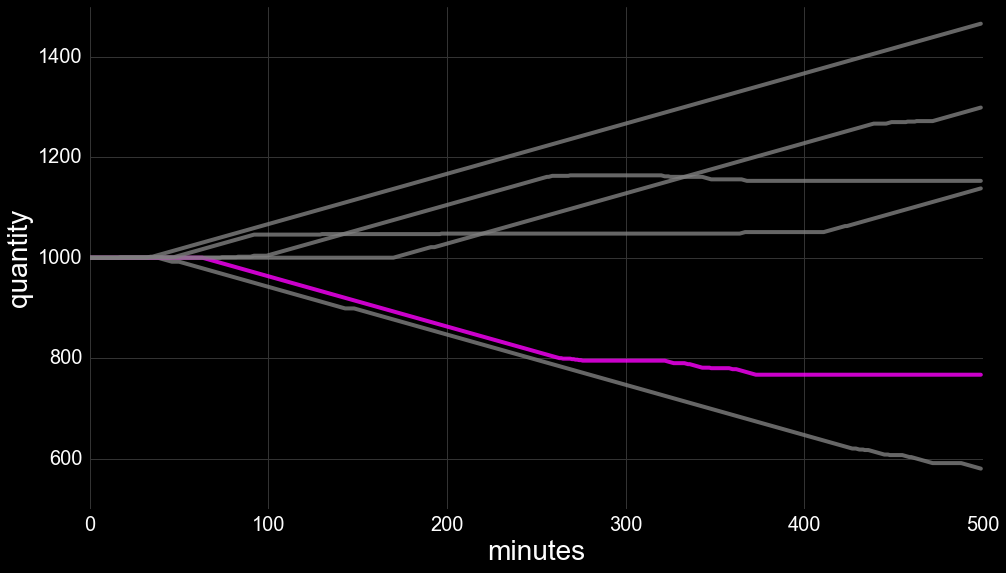

In [30]:
init(mu = mu, sigma = sigma, seed_arr = [100], root = root, price_init = p, minutes = minutes, plot_init = False)
share_plot(param_arr = [5], price_init = p, quantity_init = 1000, minutes = minutes, buy = 1, delta = 4) #WITH +-5%
init(mu = mu, sigma = sigma, seed_arr = [200], root = root, price_init = p, minutes = minutes, plot_init = False)
share_plot(param_arr = [5], price_init = p, quantity_init = 1000, minutes = minutes, buy = 1, delta = 4) #WITH +-5%
init(mu = mu, sigma = sigma, seed_arr = [root], root = root, price_init = p, minutes = minutes, plot_init = False)
share_plot(param_arr = [5], price_init = p, quantity_init = 1000, minutes = minutes, buy = 1, delta = 5) #WITH +-5%
init(mu = mu, sigma = sigma, seed_arr = [800], root = root, price_init = p, minutes = minutes, plot_init = False)
share_plot(param_arr = [5], price_init = p, quantity_init = 1000, minutes = minutes, buy = 1, delta = 4) #WITH +-5%
init(mu = mu, sigma = sigma, seed_arr = [1000], root = root, price_init = p, minutes = minutes, plot_init = False)
share_plot(param_arr = [5], price_init = p, quantity_init = 1000, minutes = minutes, buy = 1, delta = 4) #WITH +-5%
init(mu = mu, sigma = sigma, seed_arr = [1600], root = root, price_init = p, minutes = minutes, plot_init = False)
share_plot(param_arr = [5], price_init = p, quantity_init = 1000, minutes = minutes, buy = 1, delta = 4) #WITH +-5%

<h2>Multiple Models</h2>

In [31]:
root

500

In [32]:
init(mu = mu, sigma = sigma, seed_arr = [root], root = root, price_init = p, minutes = minutes, plot_init = False)

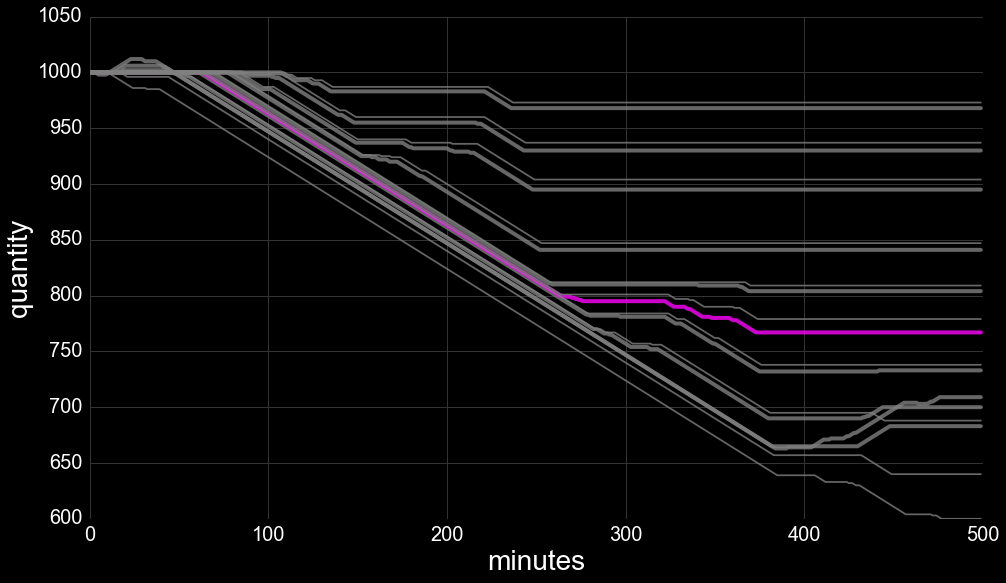

In [33]:
share_plot(param_arr = list(range(1,11)), price_init = p, quantity_init = 1000, minutes = minutes, buy = 1, delta = 5) #WITH +-5%
share_plot2(param_arr = list(range(1,11)), price_init = p, quantity_init = 1000, minutes = minutes, buy = 1, delta = 5) #WITH +-5%

## Model in 2D Space

In [46]:
def share_vol_plot(param_arr, price_init, quantity_init, minutes, buy, delta, volume_thresh):
    loop_var = 0
    #plt.axhline(y = quantity_init, linewidth=5, color=[0.7, 0.7, 0.7])
    #plt.grid(b = True, which = 'major', color = [0.2,0.2,0.2])    
    
    for param in param_arr:
        df.loc[0, 'quantity'] = quantity_init
        price_up = price_init * (1 + param /100)
        price_down = price_init * (1 - param/100)
        i = 1
        for x in range(1, minutes):
            if df.loc[i, 'price'] >= price_up and df.loc[i, 'volume'] >= volume_thresh:
                df.loc[i, 'quantity'] = df.loc[i-1, 'quantity'] - buy
                df.loc[i, 'strategy'] = -1
            elif df.loc[i, 'price'] < price_down and df.loc[i, 'volume'] < volume_thresh:
                df.loc[i, 'quantity'] = df.loc[i-1, 'quantity'] + buy
                df.loc[i, 'strategy'] =  1
            else:
                df.loc[i, 'quantity'] = df.loc[i-1, 'quantity']
            i = i + 1
        #plt.xlabel('volume')
        #plt.ylabel('price')
        if param == delta:
            color = 'magenta'
        else:
            color = [0.5,0.5,0.5]
        #plt.plot(df['volume'], df['price'], color = color, alpha = 0.8)
        df.plot(kind="scatter", x = "volume", y = "price", 
                color=df["strategy"], 
                s =250,alpha = 0.8, cmap=plt.cm.viridis)
        loop_var = loop_var + 1

In [42]:
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (16, 9)

plt.rcParams['font.size'] = 18
plt.rcParams['axes.labelsize'] = 28
plt.rcParams['axes.titlesize'] = 28
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20
plt.rcParams['legend.fontsize'] = 14
plt.rcParams['figure.titlesize'] = 14

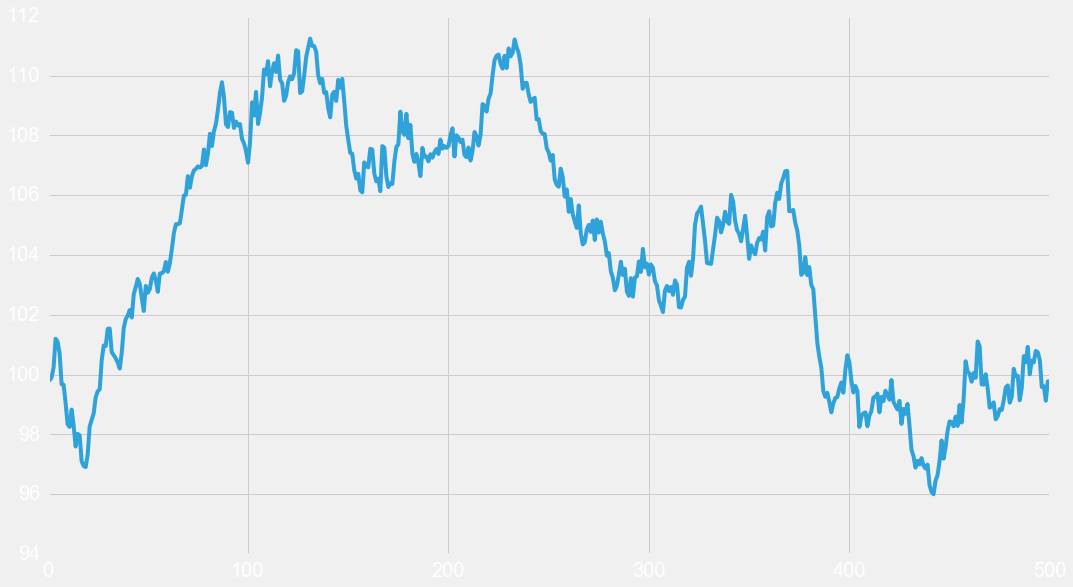

In [49]:
df.price.plot()

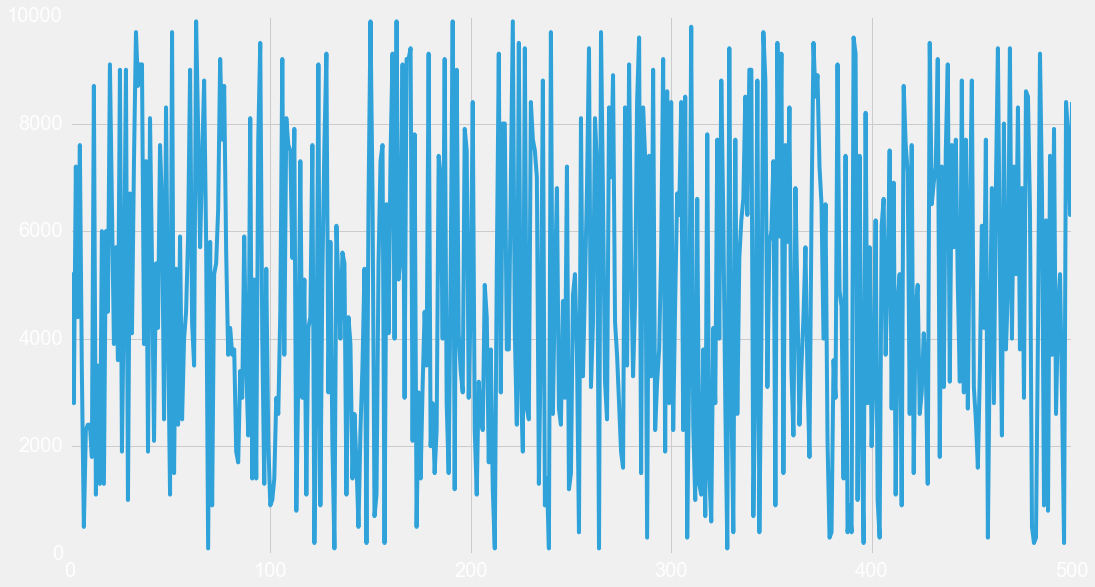

In [52]:
df.volume.plot()

In [53]:
pd.unique(df.strategy)

array([ 0, -1])

/Users/barsubra/anaconda/lib/python3.5/site-packages/pandas/tools/plotting.py:979: UserWarning: 'color' and 'colormap' cannot be used simultaneously. Using 'color'
  warnings.warn("'color' and 'colormap' cannot be used "


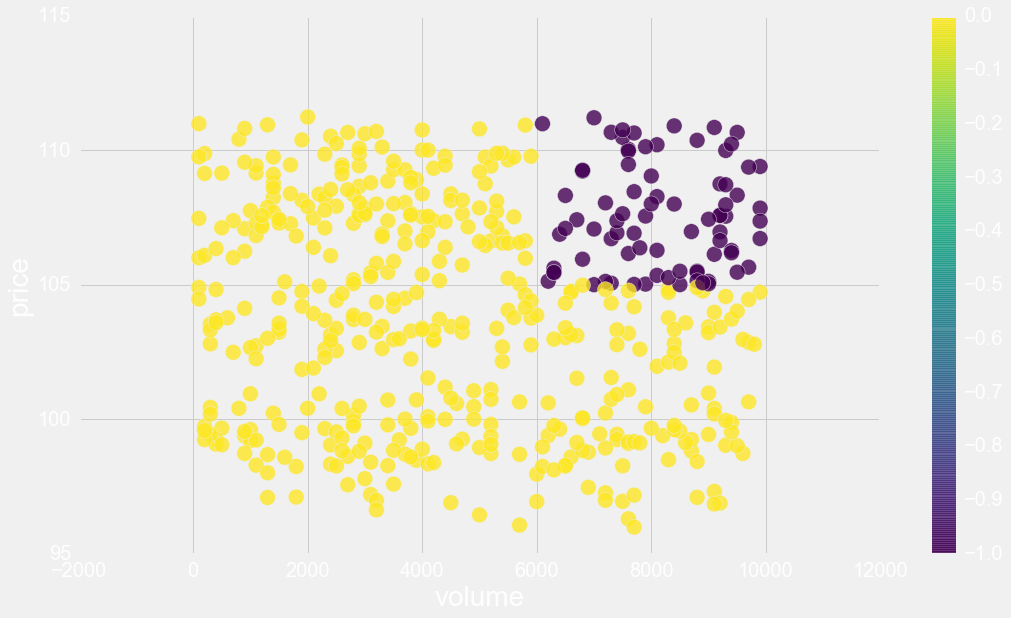

In [51]:
share_vol_plot(param_arr = [5], price_init = p, quantity_init = 1000, minutes = minutes, buy = 1, delta = 1, volume_thresh=6000) #WITH +-5%

# Model 3 Var

In [167]:
def model_3_var_plot(param_arr, price_init, quantity_init, minutes, buy, delta, volume_thresh, price_1d_thresh):
    loop_var = 0
    #plt.axhline(y = quantity_init, linewidth=5, color=[0.7, 0.7, 0.7])
    #plt.grid(b = True, which = 'major', color = [0.2,0.2,0.2])    
    print(price_1d_thresh)
    
    for param in param_arr:
        df.loc[0, 'quantity'] = quantity_init
        price_up = price_init * (1 + param /100)
        price_down = price_init * (1 - param/100)
        i = 1
        for x in range(1, minutes):
            if df.loc[i, 'price'] >= price_up and df.loc[i, 'volume'] >= volume_thresh and df.loc[i, 'price_d1'] >= price_1d_thresh:
                df.loc[i, 'quantity'] = df.loc[i-1, 'quantity'] - buy
                df.loc[i, 'strategy'] = -1
            elif df.loc[i, 'price'] <= price_down and df.loc[i, 'volume'] <= volume_thresh and df.loc[i, 'price_d1'] < price_1d_thresh :
                df.loc[i, 'quantity'] = df.loc[i-1, 'quantity'] + buy
                df.loc[i, 'strategy'] =  1
            else:
                df.loc[i, 'quantity'] = df.loc[i-1, 'quantity']
            i = i + 1
        #plt.xlabel('volume')
        #plt.ylabel('price')
        if param == delta:
            color = 'magenta'
        else:
            color = [0.5,0.5,0.5]
        #plt.plot(df['volume'], df['price'], color = color, alpha = 0.8)
        df.plot(kind="scatter", x = "volume", y = "price", 
                color=df["strategy"], 
                s =250,alpha = 0.8, cmap=plt.cm.viridis)
        loop_var = loop_var + 1

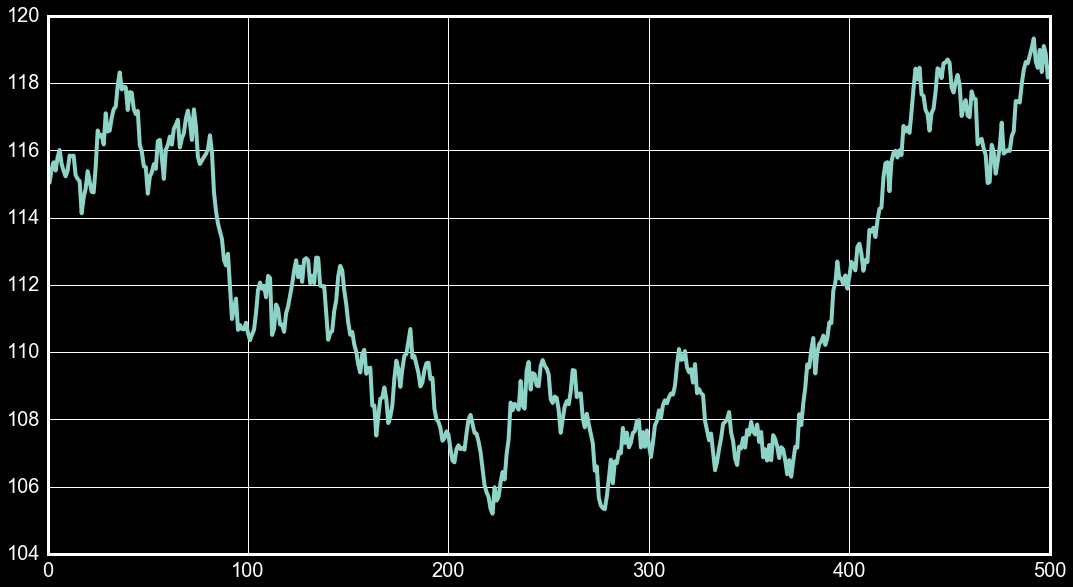

In [168]:
df.price_d1.plot()

108


/Users/barsubra/anaconda/lib/python3.5/site-packages/pandas/tools/plotting.py:979: UserWarning: 'color' and 'colormap' cannot be used simultaneously. Using 'color'
  warnings.warn("'color' and 'colormap' cannot be used "


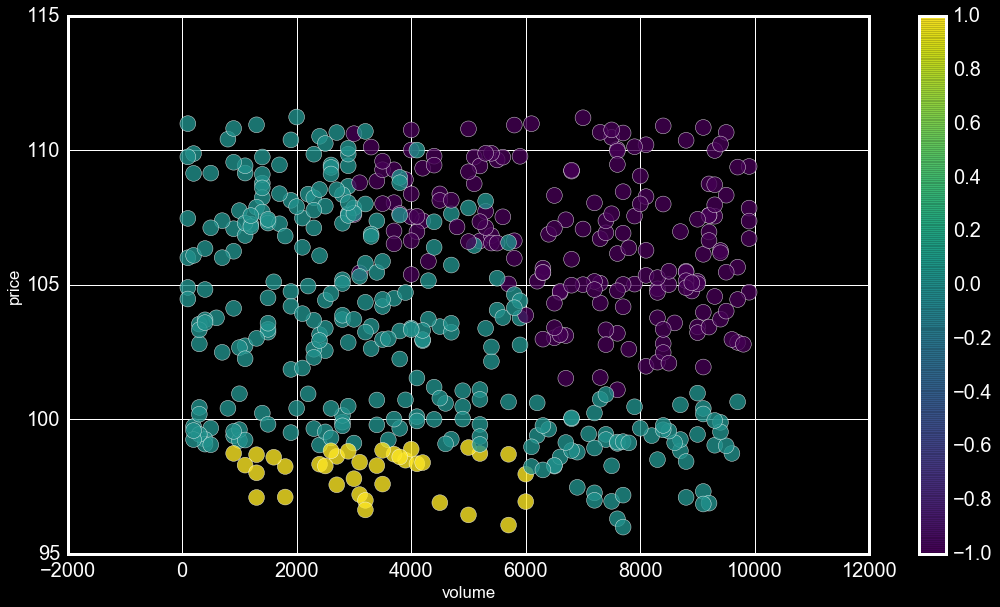

In [169]:
model_3_var_plot(param_arr = [5], price_init = p, quantity_init = 1000, minutes = minutes, buy = 1, delta = 5, volume_thresh=3000, price_1d_thresh=108) #WITH +-5%

In [170]:
plt.style.use('dark_background')

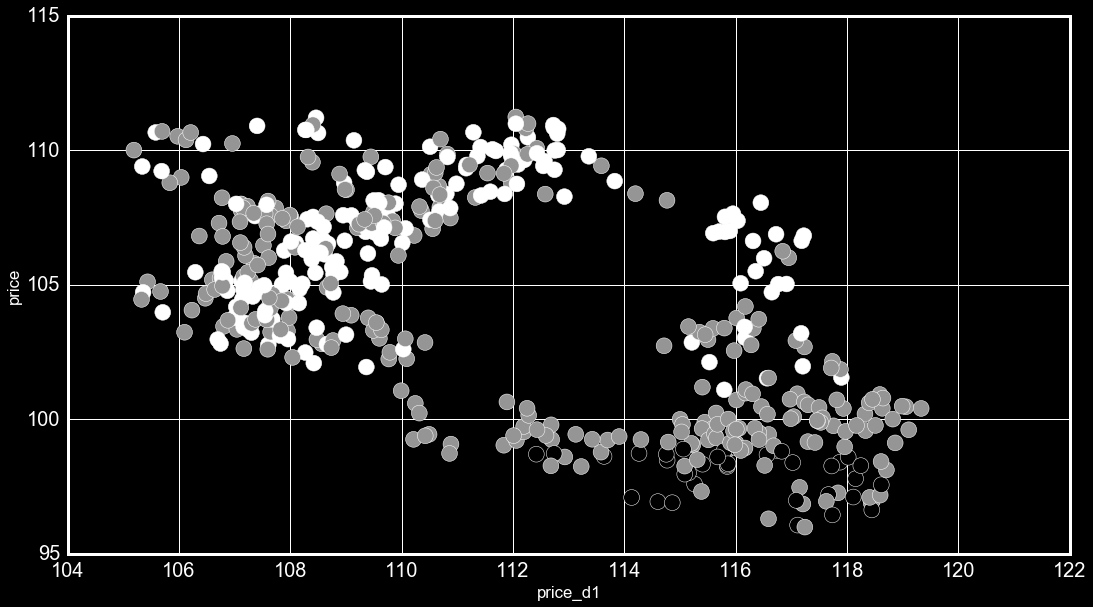

In [171]:
df.plot(kind="scatter", x="price_d1", y="price", color=df.strategy, s= 250, legend=True)

108


/Users/barsubra/anaconda/lib/python3.5/site-packages/pandas/tools/plotting.py:979: UserWarning: 'color' and 'colormap' cannot be used simultaneously. Using 'color'
  warnings.warn("'color' and 'colormap' cannot be used "


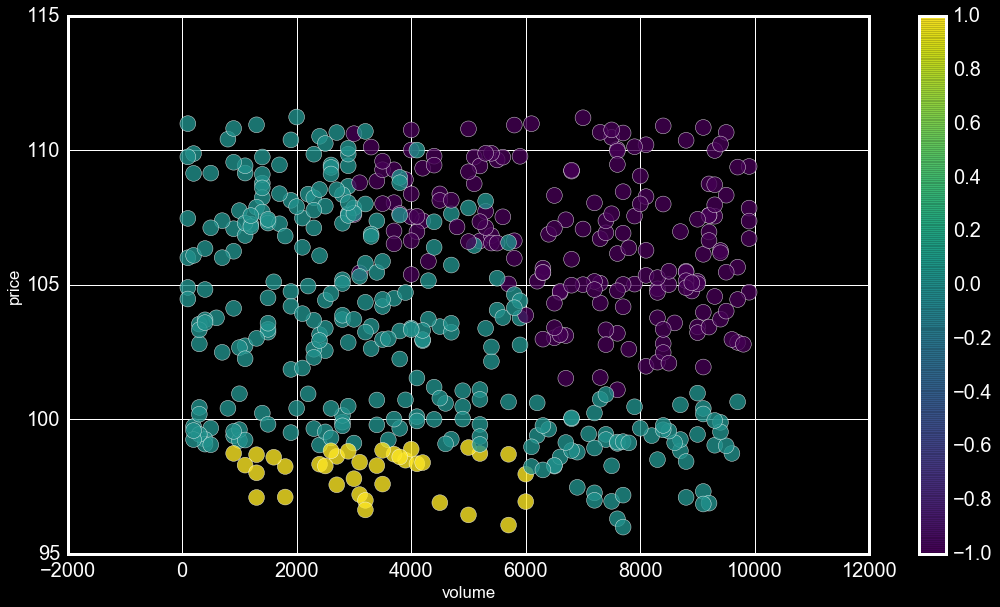

In [172]:
model_3_var_plot(param_arr = [5], price_init = p, quantity_init = 1000, minutes = minutes, buy = 1, delta = 5, volume_thresh=6000, price_1d_thresh=108) #WITH +-5%

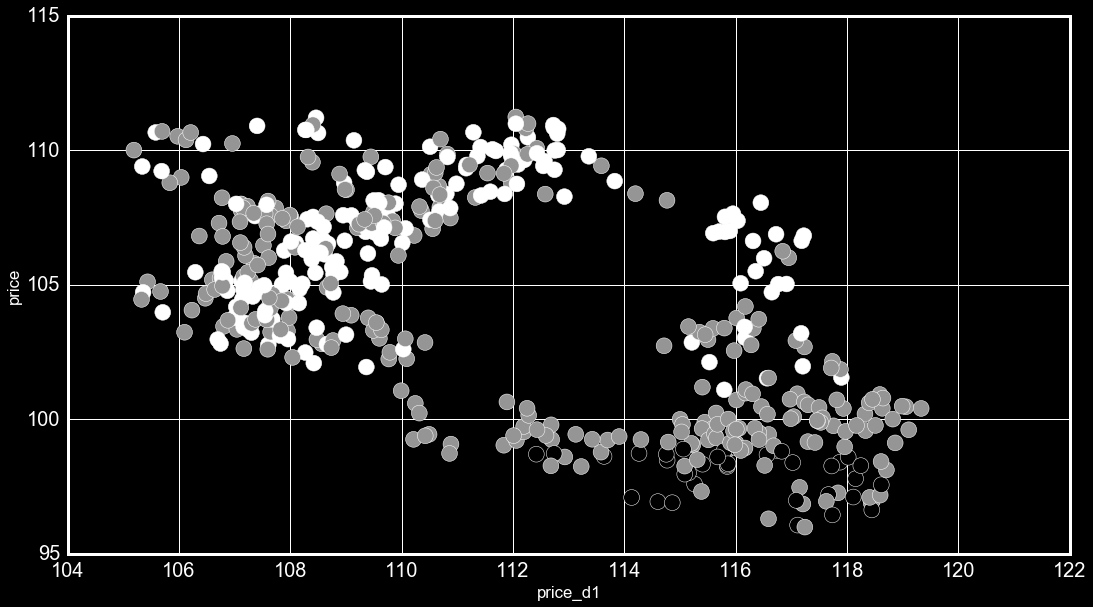

In [173]:
df.plot(kind="scatter", x="price_d1", y="price", color=df.strategy, s= 250, legend=True)

In [182]:
from mpl_toolkits.mplot3d import Axes3D

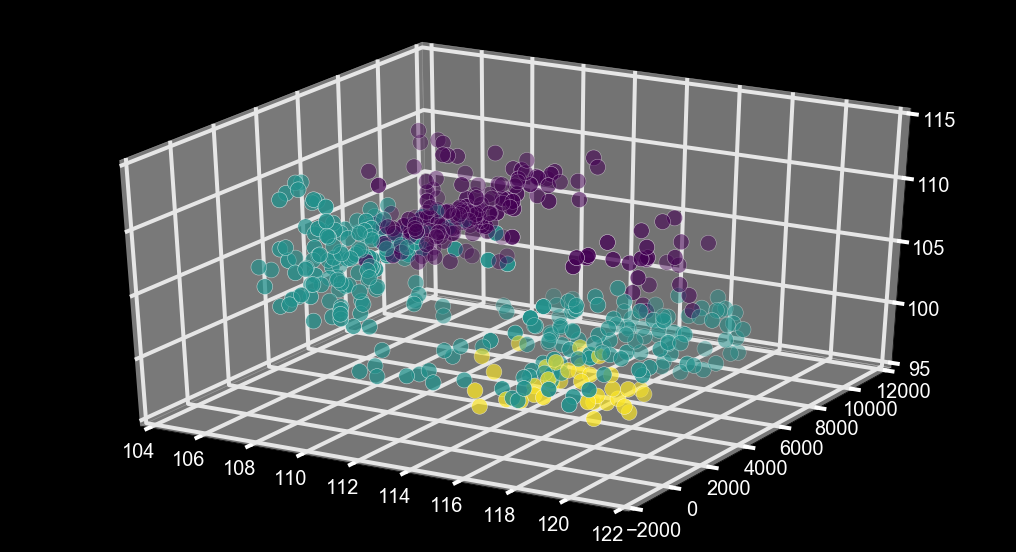

In [191]:
threedee = plt.figure().gca(projection='3d')
threedee.scatter(df['price_d1'], df['volume'], df['price'], s=250, c=df.strategy, 
                cmap=plt.cm.viridis)

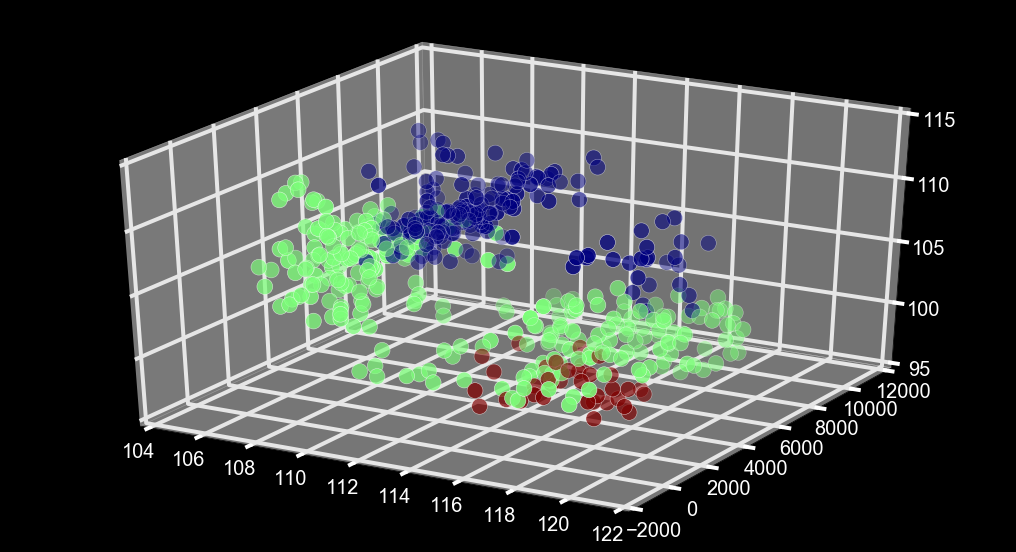

In [240]:
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import axes3d
 
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
X, Y, Z = df['price_d1'], df['volume'], df['price']
s = ax.scatter(X, Y, Z, cmap=cm.jet, c = df.strategy, s=250)
#plt.axis('off') # remove axes for visual appeal

mencoder "mf://tmprot_000.jpeg,tmprot_001.jpeg,tmprot_002.jpeg,tmprot_003.jpeg,tmprot_004.jpeg,tmprot_005.jpeg,tmprot_006.jpeg,tmprot_007.jpeg,tmprot_008.jpeg,tmprot_009.jpeg,tmprot_010.jpeg,tmprot_011.jpeg,tmprot_012.jpeg,tmprot_013.jpeg,tmprot_014.jpeg,tmprot_015.jpeg,tmprot_016.jpeg,tmprot_017.jpeg,tmprot_018.jpeg,tmprot_019.jpeg" -mf fps=10 -o movie.mp4 -ovc lavc                         -lavcopts vcodec=msmpeg4v2:vbitrate=2000
mencoder "mf://tmprot_000.jpeg,tmprot_001.jpeg,tmprot_002.jpeg,tmprot_003.jpeg,tmprot_004.jpeg,tmprot_005.jpeg,tmprot_006.jpeg,tmprot_007.jpeg,tmprot_008.jpeg,tmprot_009.jpeg,tmprot_010.jpeg,tmprot_011.jpeg,tmprot_012.jpeg,tmprot_013.jpeg,tmprot_014.jpeg,tmprot_015.jpeg,tmprot_016.jpeg,tmprot_017.jpeg,tmprot_018.jpeg,tmprot_019.jpeg" -mf fps=10 -o movie.mp4 -ovc lavc                         -lavcopts vcodec=msmpeg4v2:vbitrate=1800; ffmpeg -i movie.mp4 -r 10 movie.ogv


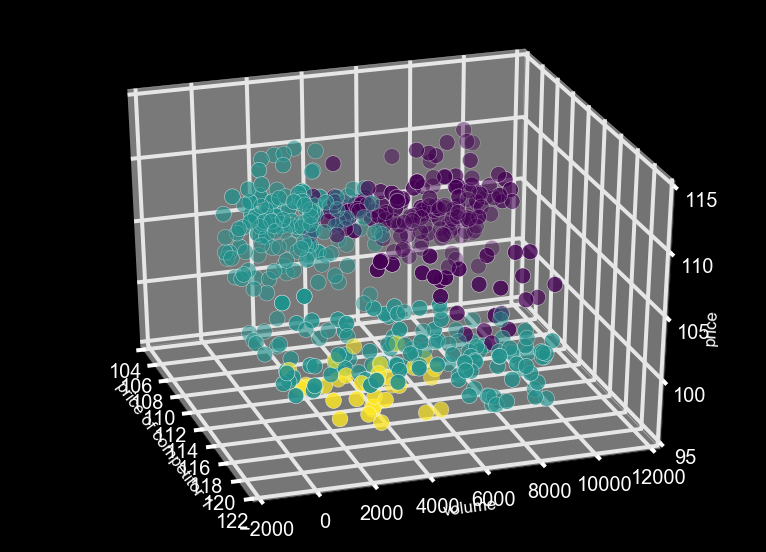

In [256]:
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import axes3d
import os, sys
import numpy as np
 
 
##### TO CREATE A SERIES OF PICTURES
 
def make_views(ax,angles,elevation=None, width=12, height = 9,
                prefix='tmprot_',**kwargs):
    """
    Makes jpeg pictures of the given 3d ax, with different angles.
    Args:
        ax (3D axis): te ax
        angles (list): the list of angles (in degree) under which to
                       take the picture.
        width,height (float): size, in inches, of the output images.
        prefix (str): prefix for the files created. 
     
    Returns: the list of files created (for later removal)
    """
     
    files = []
    ax.figure.set_size_inches(width,height)
     
    for i,angle in enumerate(angles):
     
        ax.view_init(elev = elevation, azim=angle)
        fname = '%s%03d.jpeg'%(prefix,i)
        ax.figure.savefig(fname)
        files.append(fname)
     
    return files
 
 
 
##### TO TRANSFORM THE SERIES OF PICTURE INTO AN ANIMATION
 
def make_movie(files,output, fps=10,bitrate=1800,**kwargs):
    """
    Uses mencoder, produces a .mp4/.ogv/... movie from a list of
    picture files.
    """
     
    output_name, output_ext = os.path.splitext(output)
    command = { '.mp4' : 'mencoder "mf://%s" -mf fps=%d -o %s.mp4 -ovc lavc\
                         -lavcopts vcodec=msmpeg4v2:vbitrate=%d'
                         %(",".join(files),fps,output_name,bitrate)}
                          
    command['.ogv'] = command['.mp4'] + '; ffmpeg -i %s.mp4 -r %d %s'%(output_name,fps,output)
     
    print(command[output_ext])
    output_ext = os.path.splitext(output)[1]
    os.system(command[output_ext])
 
 
 
def make_gif(files,output,delay=100, repeat=True,**kwargs):
    """
    Uses imageMagick to produce an animated .gif from a list of
    picture files.
    """
     
    loop = -1 if repeat else 0
    os.system('convert -delay %d -loop %d %s %s'
              %(delay,loop," ".join(files),output))
 
 
 
 
def make_strip(files,output,**kwargs):
    """
    Uses imageMagick to produce a .jpeg strip from a list of
    picture files.
    """
     
    os.system('montage -tile 1x -geometry +0+0 %s %s'%(" ".join(files),output))
     
     
     
##### MAIN FUNCTION
 
def rotanimate(ax, angles, output, **kwargs):
    """
    Produces an animation (.mp4,.ogv,.gif,.jpeg,.png) from a 3D plot on
    a 3D ax
     
    Args:
        ax (3D axis): the ax containing the plot of interest
        angles (list): the list of angles (in degree) under which to
                       show the plot.
        output : name of the output file. The extension determines the
                 kind of animation used.
        **kwargs:
            - width : in inches
            - heigth: in inches
            - framerate : frames per second
            - delay : delay between frames in milliseconds
            - repeat : True or False (.gif only)
    """
         
    output_ext = os.path.splitext(output)[1]
 
    files = make_views(ax,angles, **kwargs)
     
    D = { '.mp4' : make_movie,
          '.ogv' : make_movie,
          '.gif': make_gif ,
          '.jpeg': make_strip,
          '.png':make_strip}
           
    D[output_ext](files,output,**kwargs)
     
    for f in files:
        os.remove(f)
     
 
##### EXAMPLE
 
if __name__ == '__main__':
 
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    #X, Y, Z = axes3d.get_test_data(0.05)
    X, Y, Z = df['price_d1'], df['volume'], df['price']
    #s = ax.plot_surface(X, Y, Z, cmap=cm.jet)
    s = ax.scatter(X, Y, Z, cmap=cm.viridis, c = df.strategy, s=250)
    #s = ax.scatter(X, Y, Z, cmap=cm.jet, c = df.strategy)
    ax.set_xlabel('price of competitor 1')
    ax.set_ylabel('volume')
    ax.set_zlabel('price')
    #plt.axis('off') # remove axes for visual appeal
     
    angles = np.linspace(0,360,21)[:-1] # Take 20 angles between 0 and 360
 
    # create an animated gif (20ms between frames)
    rotanimate(ax, angles,'movie.gif',delay=20) 
 
    # create a movie with 10 frames per seconds and 'quality' 2000
    rotanimate(ax, angles,'movie.mp4',fps=10,bitrate=2000)
 
    # create an ogv movie
    rotanimate(ax, angles, 'movie.ogv',fps=10) 

In [257]:
import numpy as np
angles = np.linspace(0,360,21)[:-1] # A list of 20 angles between 0 and 360
 
# create an animated gif (20ms between frames)
rotanimate(ax, angles,'movie.gif',delay=100) 
 
# create a movie with 10 frames per seconds and 'quality' 2000
rotanimate(ax, angles,'movie.mp4',fps=5,bitrate=2000)
 
# create an ogv movie
rotanimate(ax, angles, 'movie.ogv',fps=5) 

mencoder "mf://tmprot_000.jpeg,tmprot_001.jpeg,tmprot_002.jpeg,tmprot_003.jpeg,tmprot_004.jpeg,tmprot_005.jpeg,tmprot_006.jpeg,tmprot_007.jpeg,tmprot_008.jpeg,tmprot_009.jpeg,tmprot_010.jpeg,tmprot_011.jpeg,tmprot_012.jpeg,tmprot_013.jpeg,tmprot_014.jpeg,tmprot_015.jpeg,tmprot_016.jpeg,tmprot_017.jpeg,tmprot_018.jpeg,tmprot_019.jpeg" -mf fps=5 -o movie.mp4 -ovc lavc                         -lavcopts vcodec=msmpeg4v2:vbitrate=2000
mencoder "mf://tmprot_000.jpeg,tmprot_001.jpeg,tmprot_002.jpeg,tmprot_003.jpeg,tmprot_004.jpeg,tmprot_005.jpeg,tmprot_006.jpeg,tmprot_007.jpeg,tmprot_008.jpeg,tmprot_009.jpeg,tmprot_010.jpeg,tmprot_011.jpeg,tmprot_012.jpeg,tmprot_013.jpeg,tmprot_014.jpeg,tmprot_015.jpeg,tmprot_016.jpeg,tmprot_017.jpeg,tmprot_018.jpeg,tmprot_019.jpeg" -mf fps=5 -o movie.mp4 -ovc lavc                         -lavcopts vcodec=msmpeg4v2:vbitrate=1800; ffmpeg -i movie.mp4 -r 5 movie.ogv


# PCA

In [7]:
df.head()

,time,price,delta,quantity,volume,price_d1,volume_d1,price_d2,volume_d2,price_d3,...,price_d4,volume_d4,price_d5,volume_d5,delta_d1,delta_d2,delta_d3,delta_d4,delta_d5,strategy
0,0,100,-0.188682,NaN,4400,115,9800,112,10900,80,...,85,1700,120,4600,0.043146,0.279070,0.112275,-1.044022,0.457094,0
1,1,99.8113,0.083379,NaN,5200,115.043,16700,112.279,6700,80.1123,...,83.956,9600,120.457,10600,0.401385,-0.696148,0.329931,-0.261794,-0.459049,0
2,2,99.8947,0.341401,NaN,2800,115.445,14100,111.583,13600,80.4422,...,83.6942,8700,119.998,13800,0.202883,0.183348,-0.262578,0.023335,-0.881566,0
3,3,100.236,0.960689,NaN,7200,115.647,1200,111.766,9300,80.1796,...,83.7175,3700,119.116,4900,-0.246977,-0.040624,0.522796,0.211520,-0.472447,0
4,4,101.197,-0.098518,NaN,4400,115.4,9900,111.726,13200,80.7024,...,83.929,5100,118.644,17800,0.393505,-0.510722,0.989325,0.507374,-0.274222,0


In [14]:
df.price_avg = (df.price_d1 + df.price_d2 + df.price_d3 + df.price_d4+ df.price_d5)/5.0

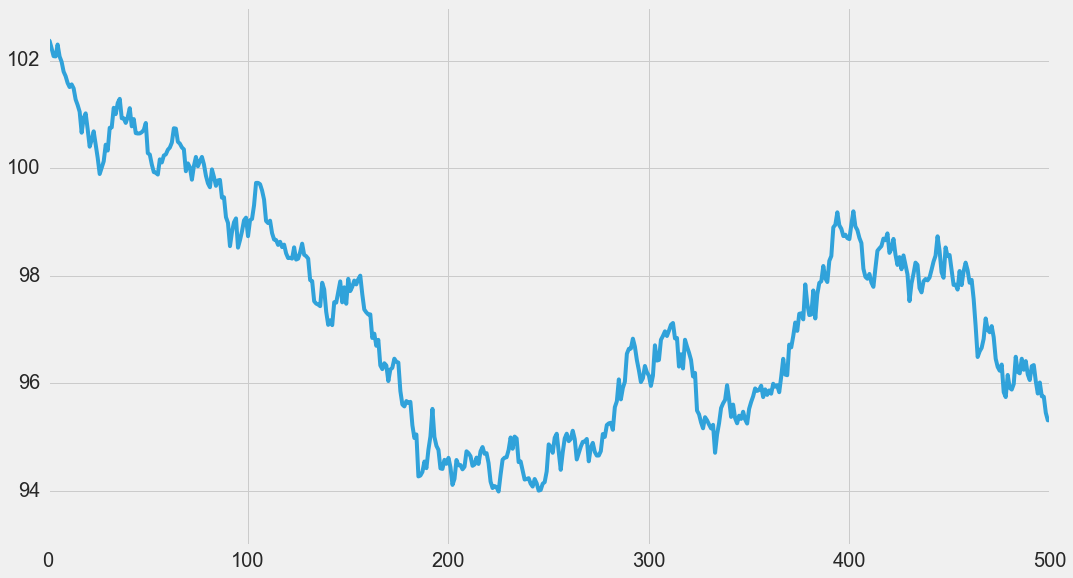

In [16]:
df.price_avg.plot()

In [58]:
def model_pca_plot(param_arr, price_init, quantity_init, minutes, buy, delta, volume_thresh, price_pca_thresh):
    loop_var = 0
    #plt.axhline(y = quantity_init, linewidth=5, color=[0.7, 0.7, 0.7])
    #plt.grid(b = True, which = 'major', color = [0.2,0.2,0.2])    

    
    for param in param_arr:
        df.loc[0, 'quantity'] = quantity_init
        price_up = price_init * (1 + param /100)
        price_down = price_init * (1 - param/100)
        i = 1
        for x in range(1, minutes):
            if df.loc[i, 'price'] >= price_up and df.loc[i, 'volume'] >= volume_thresh and df.loc[i, 'price_d1'] >= price_pca_thresh:
                df.loc[i, 'quantity'] = df.loc[i-1, 'quantity'] - buy
                df.loc[i, 'strategy'] = -1
            elif df.loc[i, 'price'] <= price_down and df.loc[i, 'volume'] <= volume_thresh and df.loc[i, 'price_d1'] < price_pca_thresh :
                df.loc[i, 'quantity'] = df.loc[i-1, 'quantity'] + buy
                df.loc[i, 'strategy'] =  1
            else:
                df.loc[i, 'quantity'] = df.loc[i-1, 'quantity']
            i = i + 1
        #plt.xlabel('volume')
        #plt.ylabel('price')
        if param == delta:
            color = 'magenta'
        else:
            color = [0.5,0.5,0.5]
        #plt.plot(df['volume'], df['price'], color = color, alpha = 0.8)
        df.plot(kind="scatter", x = "volume", y = "price", 
                color=df["strategy"], 
                s =250,alpha = 0.8, cmap=plt.cm.viridis)
        loop_var = loop_var + 1

/Users/barsubra/anaconda/lib/python3.5/site-packages/pandas/tools/plotting.py:979: UserWarning: 'color' and 'colormap' cannot be used simultaneously. Using 'color'
  warnings.warn("'color' and 'colormap' cannot be used "


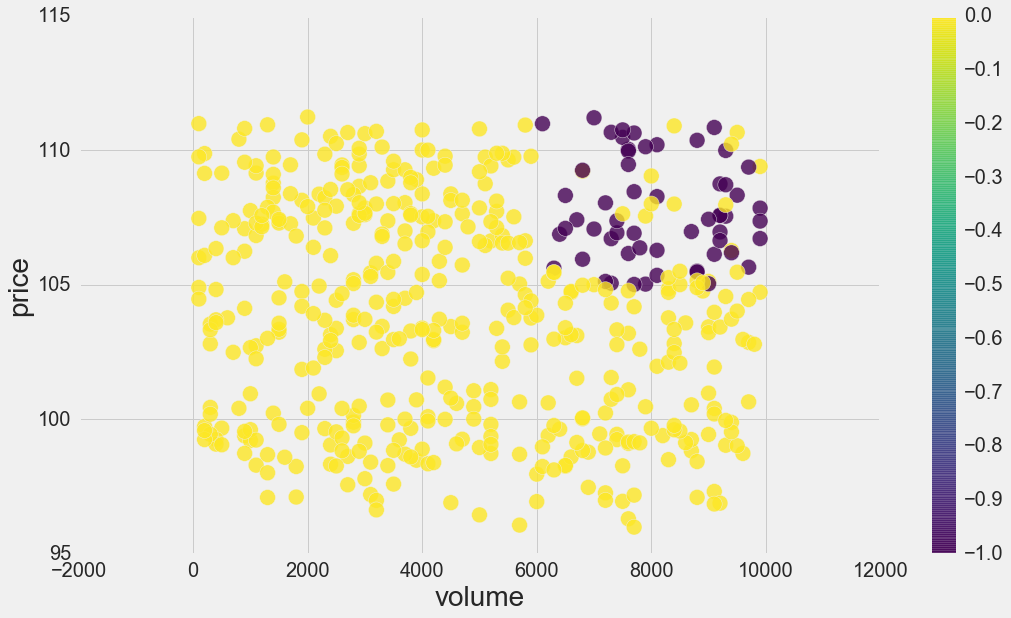

In [59]:
model_pca_plot(param_arr = [5], price_init = p, quantity_init = 1000, minutes = minutes, buy = 1, delta = 5, volume_thresh=6000, price_pca_thresh=108) #WITH +-5%

In [52]:
df.columns

Index(['time', 'price', 'delta', 'quantity', 'volume', 'price_d1', 'volume_d1',
       'price_d2', 'volume_d2', 'price_d3', 'volume_d3', 'price_d4',
       'volume_d4', 'price_d5', 'volume_d5', 'delta_d1', 'delta_d2',
       'delta_d3', 'delta_d4', 'delta_d5', 'strategy', 'price_avg'],
      dtype='object')

In [55]:
df.ix[60:70,:]

,time,price,delta,quantity,volume,price_d1,volume_d1,price_d2,volume_d2,price_d3,...,volume_d4,price_d5,volume_d5,delta_d1,delta_d2,delta_d3,delta_d4,delta_d5,strategy,price_avg
60,60,103.438,0.284980,1000,9000,116.16,6300,113.702,14900,77.1708,...,11300,114.425,1600,0.253234,-0.158969,0.100090,0.150752,-0.137113,0,100.344
61,61,103.723,0.474646,1000,4300,116.413,1600,113.543,16300,77.2709,...,6400,114.288,9800,-0.240201,0.714709,-0.491925,0.323816,0.158163,0,100.386
62,62,104.198,0.528929,1000,3500,116.173,4100,114.257,20200,76.779,...,10800,114.446,17300,0.474799,0.246083,0.846445,-0.590632,0.351895,0,100.479
63,63,104.727,0.301968,1000,9900,116.648,8000,114.503,14100,77.6254,...,9700,114.798,6900,0.115379,-0.219236,-0.188610,-0.143933,0.406500,0,100.745
64,64,105.029,0.004376,NaN,7900,116.763,17200,114.284,8300,77.4368,...,11000,115.205,14000,0.149081,-0.264149,-0.708713,-0.206129,-0.195041,0,100.739
65,65,105.033,0.027585,NaN,5700,116.912,9900,114.02,15300,76.7281,...,9100,115.009,16600,-0.824613,0.850293,-0.012460,0.284986,-0.474621,0,100.494
66,66,105.061,0.447796,NaN,7300,116.088,12400,114.87,1500,76.7156,...,600,114.535,10300,0.270593,-0.135682,0.138573,0.158752,-0.778899,0,100.458
67,67,105.509,0.481660,NaN,8800,116.358,9400,114.735,8300,76.8542,...,13800,113.756,8000,0.150778,0.140336,0.268360,-0.048349,-0.695662,0,100.389
68,68,105.99,0.018499,NaN,5800,116.509,3600,114.875,10300,77.1226,...,200,113.06,13800,0.442816,-0.209968,-0.277149,-1.551622,-0.434964,0,100.352
69,69,106.009,0.630246,NaN,100,116.952,1900,114.665,1700,76.8454,...,3100,112.625,7400,0.233016,-0.501081,0.113857,0.352124,0.530069,0,99.9459


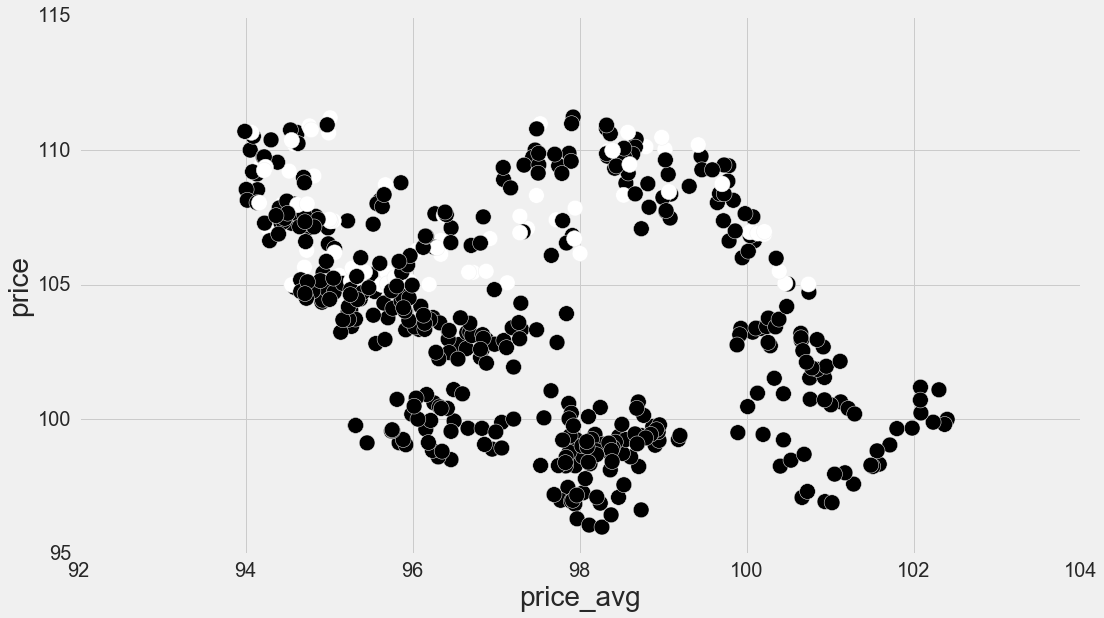

In [40]:
df.plot(kind="scatter", x="price_avg", y="price", color=df.strategy, s= 250, legend=True)

In [1]:
def plot_pca(n_components, X, col):
    pca = PCA(n_components = n_components)
    y = pca.fit(X)
    print('Variance: ', pca.explained_variance_ratio_)
    tr = pca.transform(X)
    plt.scatter(tr[:,0], tr[:,1], c = col, cmap=plt.cm.plasma)